In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [135]:
cust_aq= pd.read_csv("F:\\AnalyticslabFIles\\Projects\\python\\Case Study 2 - Credit Card Case Study\\Customer Acqusition.csv")
repay= pd.read_csv("F:\\AnalyticslabFIles\\Projects\\python\\Case Study 2 - Credit Card Case Study\\Repayment.csv")
spend= pd.read_csv("F:\\AnalyticslabFIles\\Projects\\python\\Case Study 2 - Credit Card Case Study\\spend.csv")

In [136]:
cust_aq.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [137]:
repay.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [138]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


### Following are some of Mr. Watson’s questions to a Consultant (like you) to understand the customers spend & repayment behavior.


#### 1. In the above dataset,
##### a. In case age is less than 18, replace it with mean of age values.


In [139]:
cust_aq.loc[cust_aq.Age < 18, 'Age']= cust_aq.Age.mean()

 ##### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
 ##### (customer’s limit provided in acquisition table is the per transaction limit on his card

In [140]:
# Joining cust_aq and spend 
cust_aq_spend= pd.merge(left= cust_aq, right= spend, how= 'inner', on= 'Customer')

In [141]:
cust_aq_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07


In [142]:
cust_aq_spend.loc[cust_aq_spend.Amount > cust_aq_spend.Limit, 'Amount'] = cust_aq_spend.Limit*.5

##### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.


In [143]:
# Joining cust_aq and repay
cust_aq_repay= pd.merge(left= cust_aq, right= repay, how= 'inner', on= 'Customer')

In [144]:
cust_aq_repay.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,Unnamed: 4
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,12-Jan-04,495414.75,NaN
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,3-Jan-04,245899.02,NaN
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,15-Jan-04,259490.06,NaN
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,25-Jan-04,437555.12,NaN
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,17-Jan-05,165972.88,NaN


In [145]:
cust_aq_repay.loc[cust_aq_repay.Amount > cust_aq_repay.Limit, 'Amount']= cust_aq_repay.Limit

#### 2. From the above dataset create the following summaries:


#####  a. How many distinct customers exist?

In [146]:
cust_aq.Customer.nunique()

100

##### b. How many distinct categories exist?

In [147]:
cust_aq.Product.nunique()

3

##### c. What is the average monthly spend by customers?

In [148]:
cust_aq_spend.Month= pd.to_datetime(cust_aq_spend.Month)

In [149]:
cust_aq_spend.loc[:, 'Month_Name']= cust_aq_spend.Month.dt.month_name()

In [150]:
cust_aq_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Month_Name
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,January
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,January
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,January
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,January
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,January


In [151]:
pd.pivot_table(data= cust_aq_spend, values= 'Amount', index= 'Month_Name', aggfunc= 'mean').head()

,Amount
Month_Name,
April,135035.927333
August,165759.596190
December,117272.680357
February,151261.565126
January,147770.183266


##### d. What is the average monthly repayment by customers?


In [152]:
cust_aq_repay.Month= pd.to_datetime(cust_aq_repay.Month)

In [153]:
cust_aq_repay.loc[:, 'Month_Name']= cust_aq_repay.Month.dt.month_name()

In [154]:
pd.pivot_table(cust_aq_repay, values= 'Amount', index='Month_Name', aggfunc= 'mean')

,Amount
Month_Name,
April,167676.814933
August,152817.425510
December,190138.995000
February,158873.098158
January,163445.534263
July,165203.918980
June,114146.549375
March,156430.854155
May,186097.903985


##### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
##### (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment  – Monthly spend. Interest is earned only on positive profits and not on negative amounts)


In [155]:
# joining the two all the three tables
cust_spend_repay= pd.merge(left= cust_aq_spend, right= repay, how= 'inner', on= 'Customer')

In [156]:
cust_spend_repay.drop(columns= ['Sl No:', 'SL No:', 'No', 'Unnamed: 4'], inplace= True)

In [157]:
cust_spend_repay.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Type,Amount_x,Month_Name,Month_y,Amount_y
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,January,12-Jan-04,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,January,3-Jan-04,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,January,15-Jan-04,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,January,25-Jan-04,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,January,17-Jan-05,165972.88


In [158]:
dummy_df= pd.pivot_table(data= cust_spend_repay, values= ['Amount_x', 'Amount_y'], index= 'Month_Name', aggfunc= 'sum')

In [159]:
dummy_df.head()

,Amount_x,Amount_y
Month_Name,,
April,5.295670e+08,9.488581e+08
August,1.887379e+08,2.749142e+08
December,7.618486e+07,1.652582e+08
February,9.257089e+08,1.451522e+09
January,1.339083e+09,2.139287e+09


In [160]:
dummy_df.loc[:, 'Monthly_Profit']= dummy_df.Amount_y - dummy_df.Amount_x

In [161]:
dummy_df.loc[:, 'Profit']= dummy_df.Monthly_Profit * 0.029

#####  f. What are the top 5 product types?

In [162]:
cust_spend_repay.Type.value_counts().head()

PETRO           4829
CAMERA          4237
FOOD            4056
AIR TICKET      3537
TRAIN TICKET    3387
Name: Type, dtype: int64

#####  g. Which city is having maximum spend?


In [163]:
pd.pivot_table(data= cust_spend_repay, values= 'Amount_x', index= 'City', aggfunc= 'sum').sort_values(ascending= False, by= 'Amount_x').head(1)

,Amount_x
City,
COCHIN,1.175903e+09


##### h. Which age group is spending more money?


In [164]:
pd.pivot_table(data= cust_spend_repay, values= 'Amount_x', index= 'Age', aggfunc= 'sum').sort_values(ascending= False, by= 'Amount_x').head(1)

,Amount_x
Age,
28.0,6.154699e+08


##### i. Who are the top 10 customers in terms of repayment?

In [165]:
pd.pivot_table(data= cust_spend_repay, values= 'Amount_y', index= 'Customer', aggfunc= 'sum').sort_values(ascending= False, by= 'Amount_y').head(1)

,Amount_y
Customer,
A61,4.004874e+08


#### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same

In [166]:
cust_spend_repay.loc[:, 'Year']= cust_spend_repay.Month_x.dt.year 

In [167]:
cust_spend_repay.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Type,Amount_x,Month_Name,Month_y,Amount_y,Year
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,January,12-Jan-04,495414.75,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,January,3-Jan-04,245899.02,2004


In [168]:
q3= pd.pivot_table(data= cust_spend_repay, index= ['City',  'Year', 'Product'], values= 'Amount_x', aggfunc= 'sum')

In [169]:
q3

Amount_x
City       Year Product               
BANGALORE  2004 Gold      2.480069e+08
                Platimum  2.942657e+07
                Silver    2.845089e+07
           2005 Gold      3.570769e+08
                Platimum  2.242526e+07
...                                ...
TRIVANDRUM 2005 Platimum  1.116447e+08
                Silver    5.128347e+06
           2006 Gold      7.386419e+07
                Platimum  6.656952e+07
                Silver    8.811362e+06

[72 rows x 1 columns]

#### 4. Create graphs for
##### a. Monthly comparison of total spends, city wise

In [170]:
q4a= pd.pivot_table(cust_aq_spend, values= 'Amount', index= 'City', columns= 'Month_Name', aggfunc='sum')

In [171]:
q4a

Month_Name,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90
DELHI,777240.75,155402.16,842342.02,1494064.06,2714261.45,50001.50,511276.09,2267149.02,1600322.07,391610.96,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199293.45,453773.94,640922.26,2857123.89,3704336.99,260484.50,400336.83,2392316.51,2813534.48,143387.40,285581.92,186063.70


<AxesSubplot:xlabel='City'>

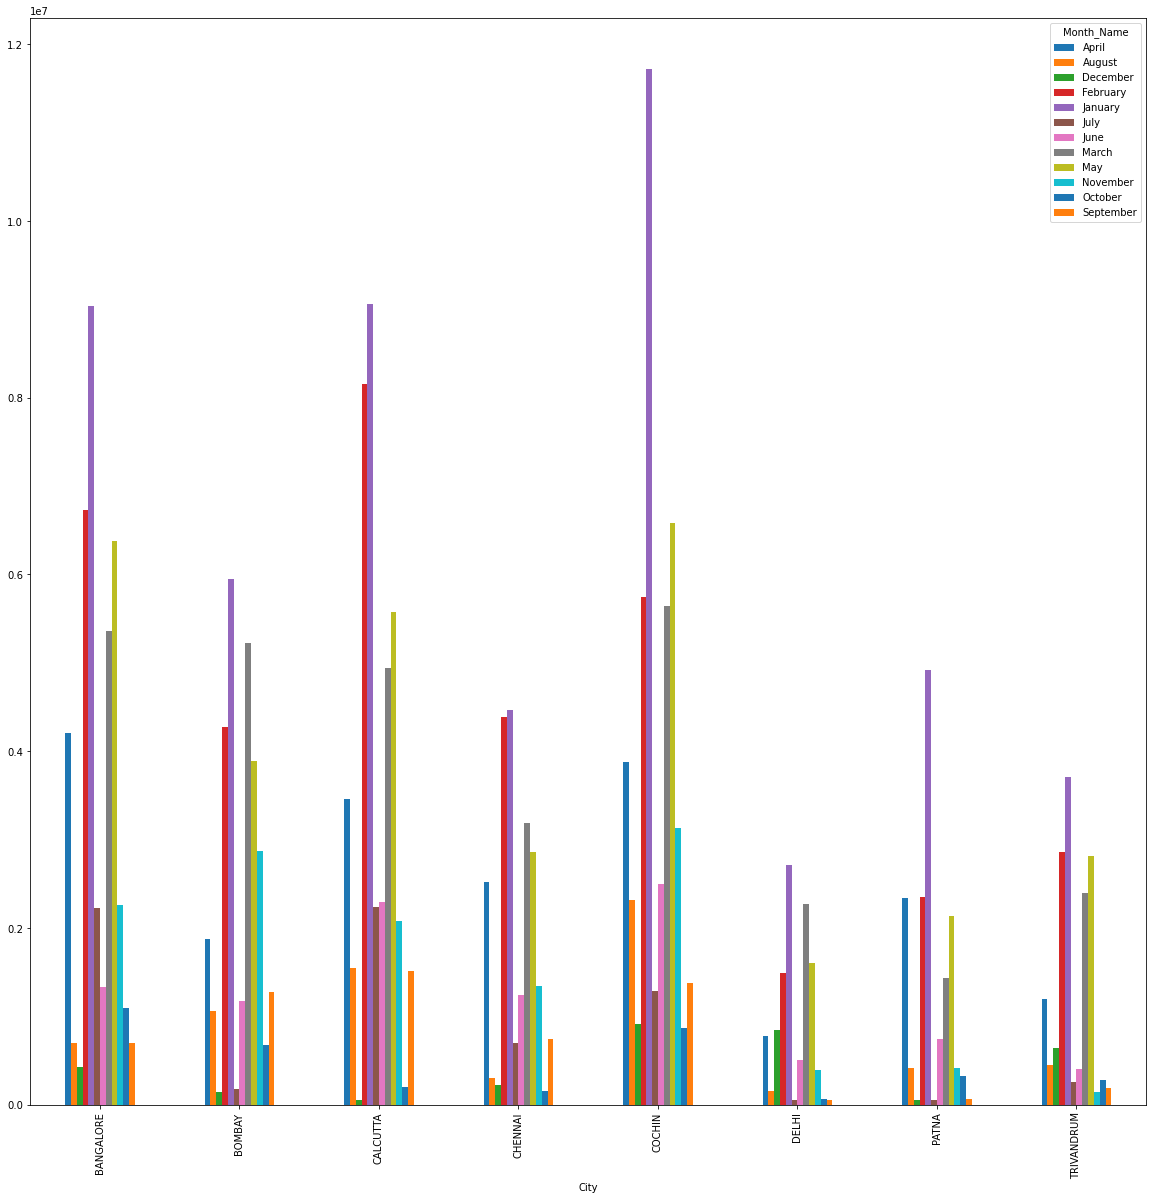

In [247]:
q4a.plot(kind= 'bar', figsize= (20, 20), fontsize= 10)

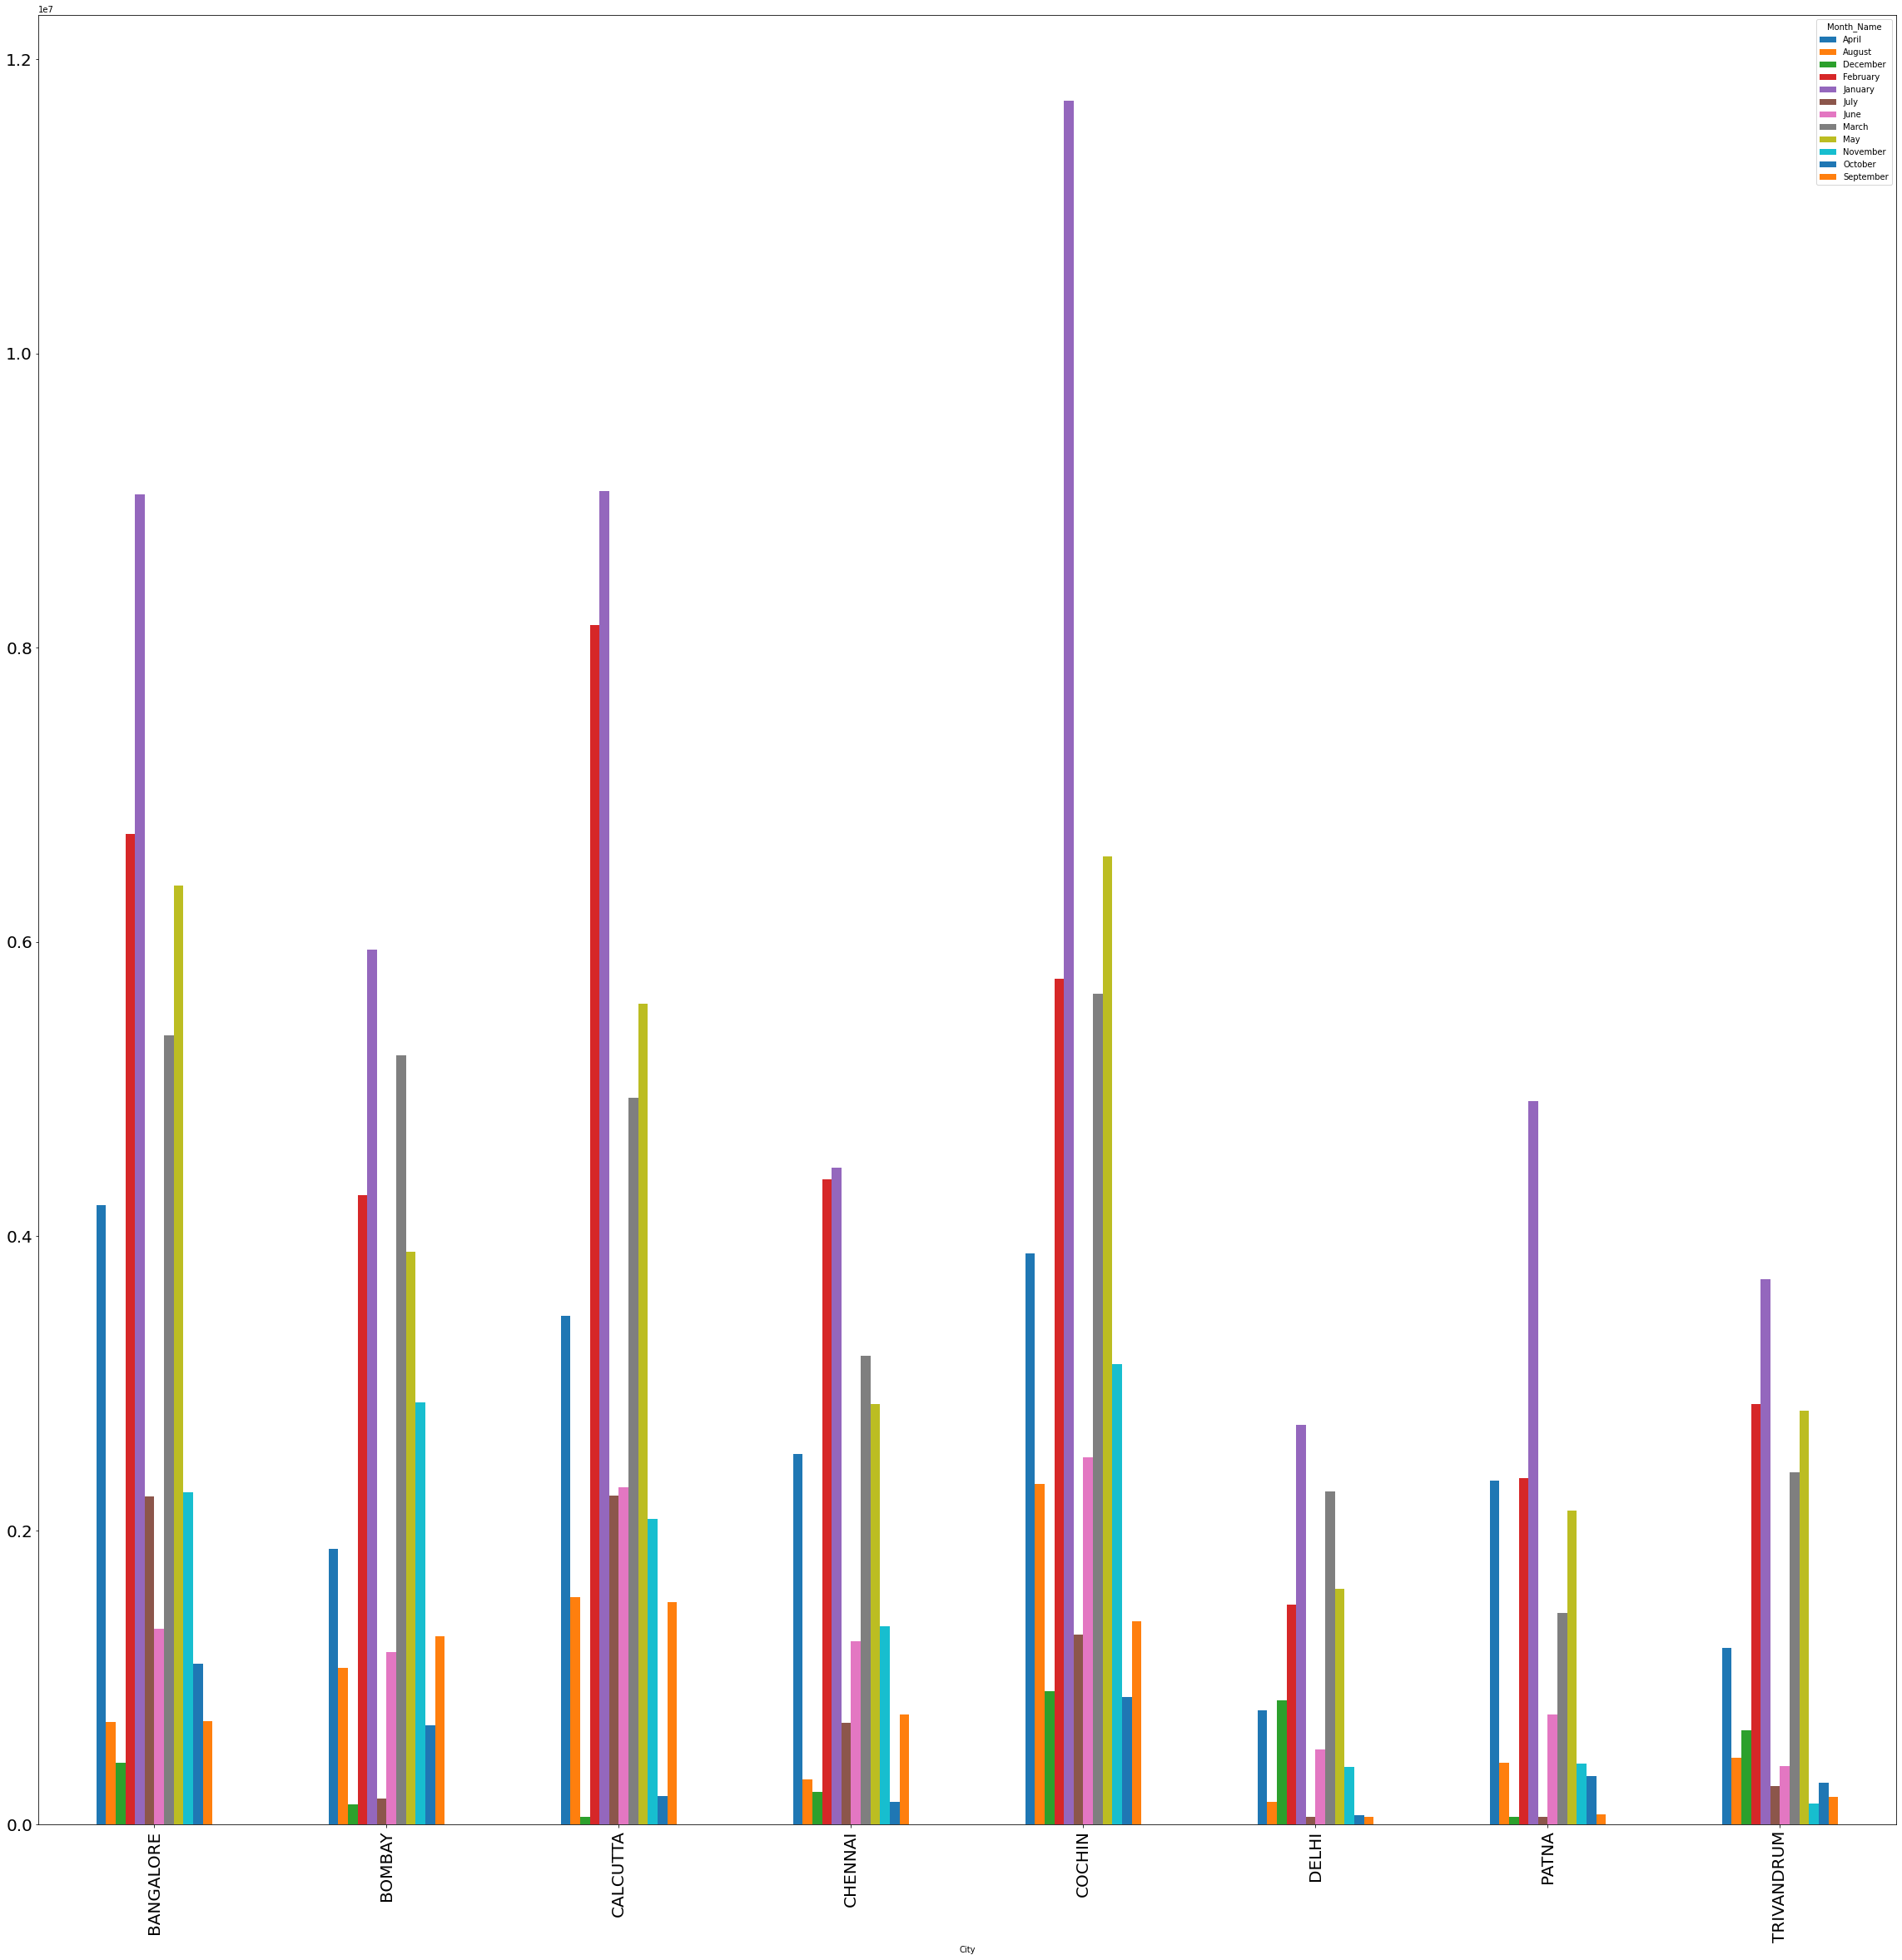

In [173]:
q4a.plot(kind= 'bar', figsize= (40, 40), fontsize= 20)
plt.show()

##### b. Comparison of yearly spend on air tickets

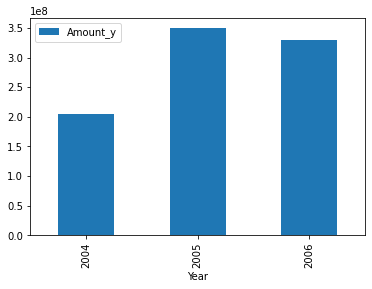

In [174]:
cust_spend_repay.loc[cust_spend_repay.Type== 'AIR TICKET', :].pivot_table(values= 'Amount_y', index= 'Year', aggfunc= 'sum').plot(kind= 'bar')
plt.show()

In [175]:
cust_aq_spend.Type.unique()

array(['JEWELLERY', 'PETRO', 'CLOTHES', 'FOOD', 'CAMERA', 'SANDALS',
       'CAR', 'TRAIN TICKET', 'BUS TICKET', 'AIR TICKET', 'MOVIE TICKET',
       'RENTAL', 'BIKE', 'AUTO', 'SHOPPING'], dtype=object)

##### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

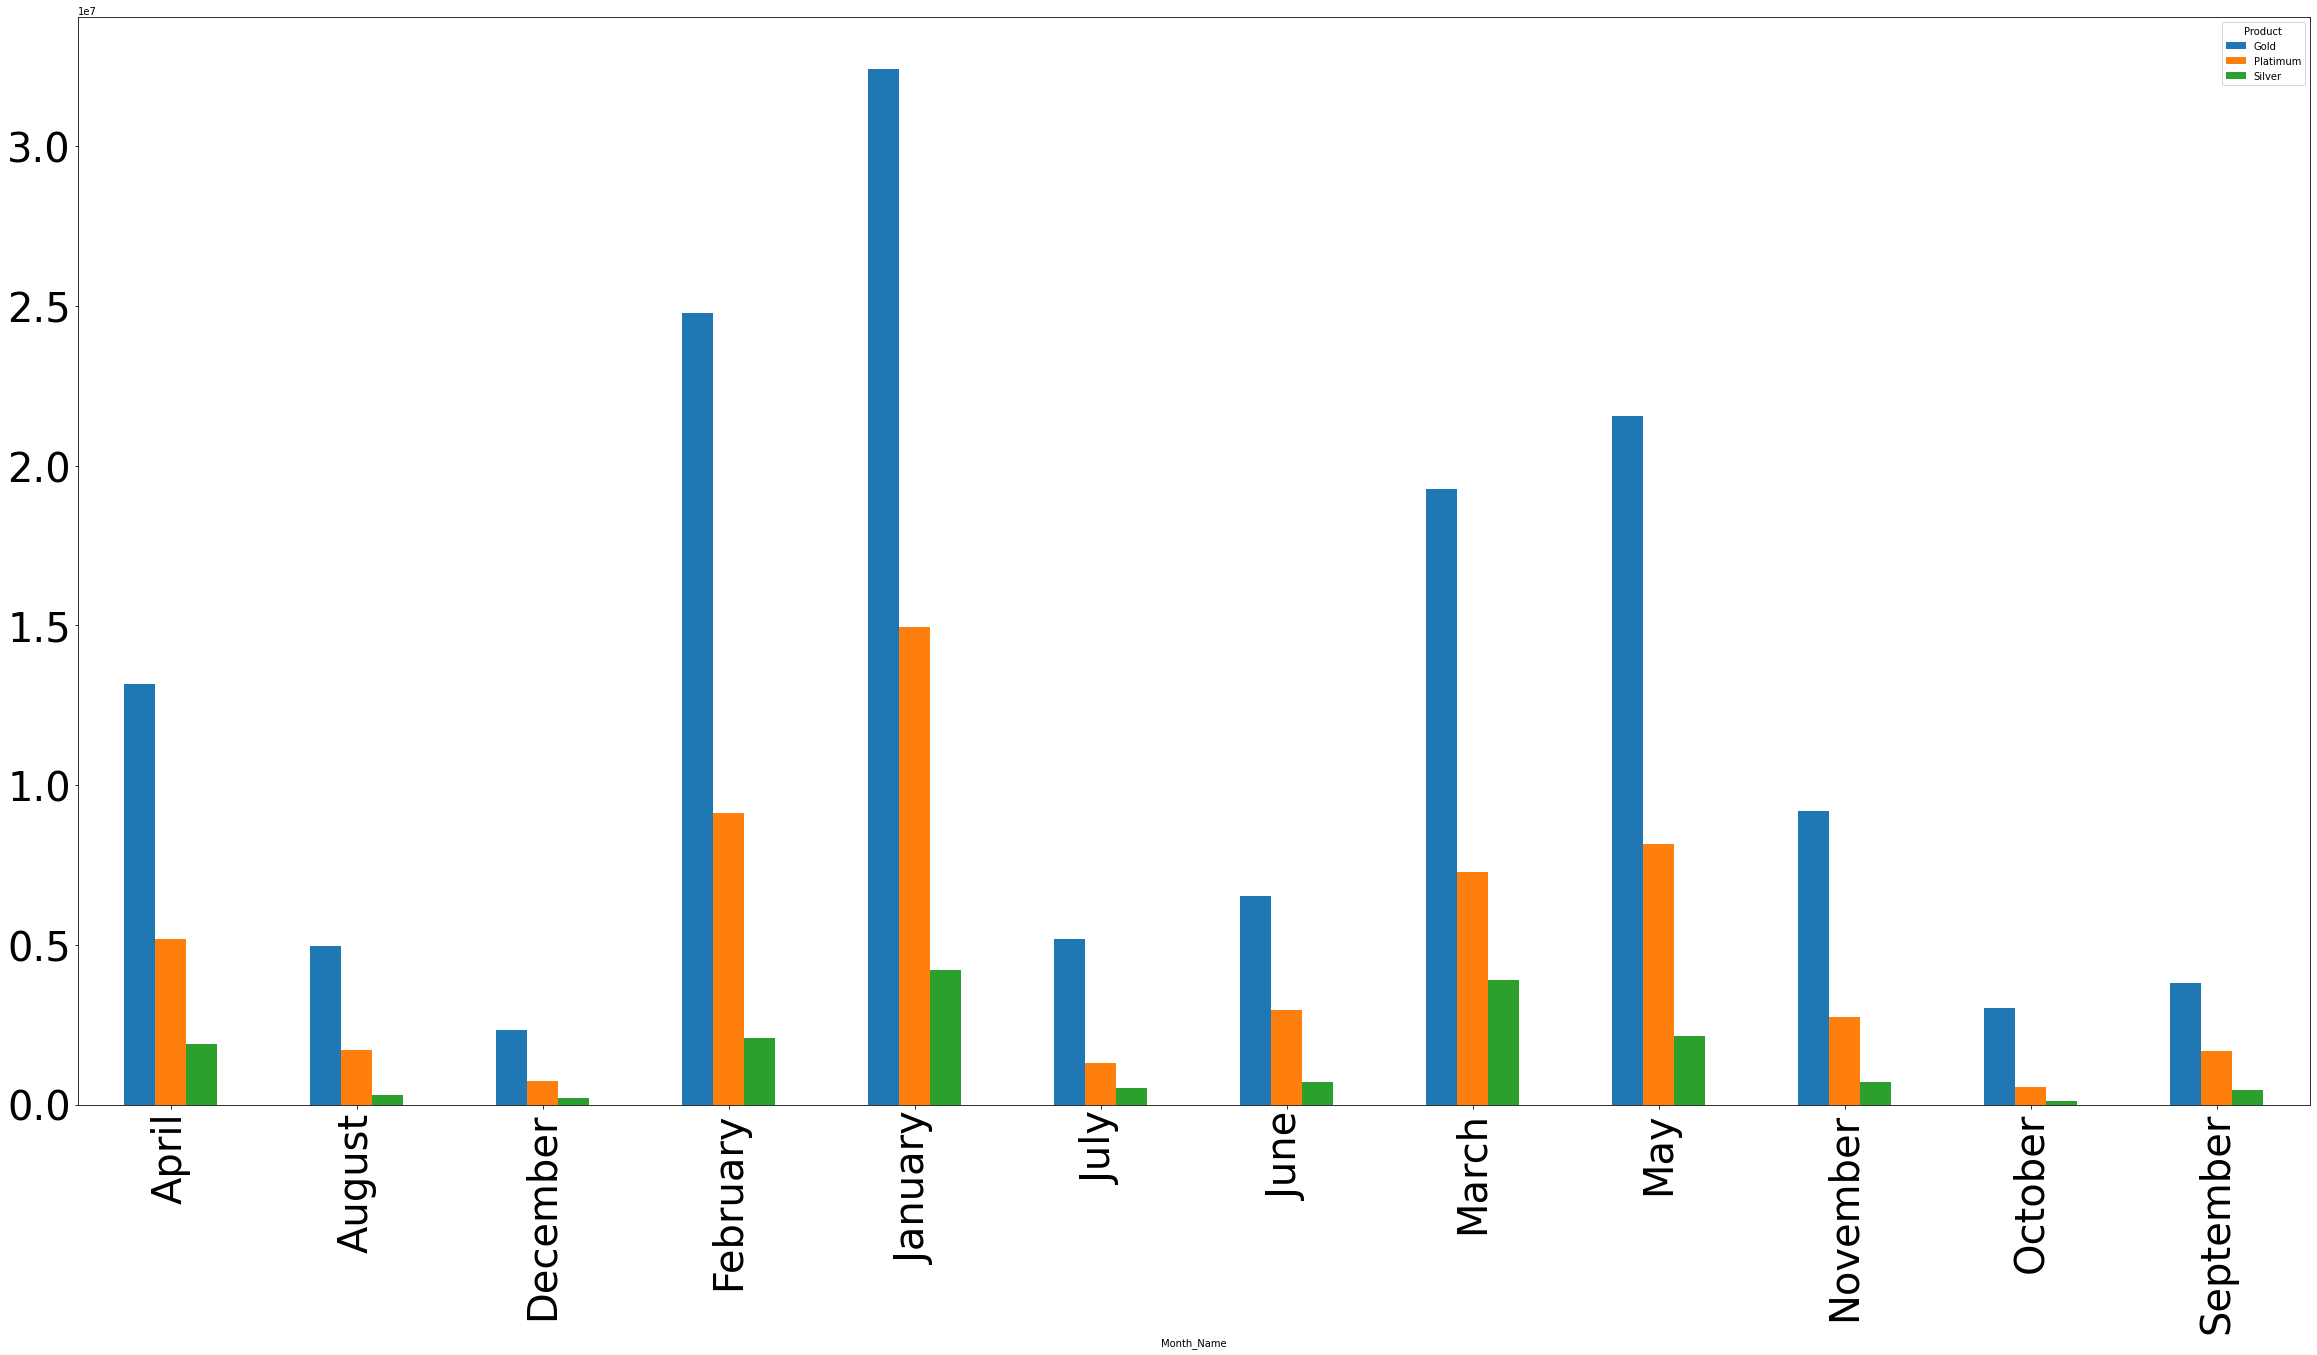

In [244]:
pd.pivot_table(cust_aq_spend, values= 'Amount', index= 'Month_Name', columns= 'Product', aggfunc='sum').plot(kind= 'bar', figsize= (40, 20), fontsize= 40)
plt.show()

#### 5. Write user defined PYTHON function to perform the following analysis:
##### You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers

In [243]:
cust_aq_repay.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,Unnamed: 4,Month_Name,yearly,monthly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,2004-01-12,495414.75,NaN,January,2004,1
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,2004-01-03,245899.02,NaN,January,2004,1


In [236]:
cust_aq_repay['yearly']=cust_aq_repay.Month.apply(lambda x:x.year)
cust_aq_repay['monthly']=cust_aq_repay.Month.apply(lambda x:x.month)

In [237]:
def top_10_cust(Product_cat, time_period):
    return cust_aq_repay.loc[cust_aq_repay.Product== Product_cat, :].pivot_table( values= 'Amount', index=['Customer','City','Product', time_period], aggfunc= 'sum' ).sort_values(by= 'Amount', ascending= False).reset_index().Customer.head(10)

In [239]:
Product_cat=str(input("Please Enter Product Category and product category should be in Gold/Silver/Platinum: "))
time_period=str(input("Please Enter Time Period and time period should be in yearly/monthly: "))

Please Enter Product Category and product category should be in Gold/Silver/Platinum: Gold
Please Enter Time Period and time period should be in yearly/monthly: monthly


In [240]:
top10Customers_Analysis=top_10_cust(Product_cat,time_period)

In [242]:
top10Customers_Analysis

0    A61
1    A42
2    A30
3    A29
4    A42
5    A60
6    A44
7     A1
8    A60
9    A28
Name: Customer, dtype: object